### Simple Reccommedations

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
anime = pd.read_csv('/content/drive/My Drive/anime data/anime.csv')
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


Cleaning up the name column from non-alphanumeric characters


In [3]:
anime.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

In [4]:
#converting the name column into string datatype
anime['name'] = anime['name'].astype('str')

In [5]:
#creating the function to remove the non-alphanumeric characters
import re
def clean_up(s):
  new_s = re.sub(r"[^\sa-zA-Z0-9\.\,\;]","",str(s))
  return new_s


In [6]:
anime['name'] = anime['name'].apply(clean_up)

In [7]:
#after clean-up
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [8]:
ratings = pd.read_csv('/content/drive/My Drive/anime data/rating.csv')
ratings.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [9]:
len(ratings)

7813737

In [10]:
#dropping all rows with rating value of -1. ie. the user_id did not rate the anime
ratings = ratings[ratings['rating'] != -1]
len(ratings)

6337241

In [11]:
anime.shape

(12294, 7)

In [12]:
ratings.shape

(6337241, 3)

In [13]:
#renaming rating in anime df rating to average rating
anime.rename(columns={'rating':'average_rating'}, inplace=True)

In [14]:
anime.head()

,anime_id,name,genre,type,episodes,average_rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


## Merging both the anime and rating dataframes

### Important points to grasp about the datasets
In the anime.csv file, **anime_id** is **unique** for each row.
In the rating.csv file, neither **anime_id** nor  **user_id** is  **unique**. 
When we merge both, our **index** is the only unique column.

In [15]:
#we merge based on anime_id cus they're both common in the 2 dataframes
df_merged = pd.merge(ratings,anime,on='anime_id')

In [16]:
unique_user_ids = len(df_merged['user_id'].unique())
unique_anime_ids = len(df_merged['anime_id'].unique())
lenghth_of_rows = df_merged.shape[0]
print(f"Length of unique user_ids: {unique_user_ids}, length of unique anime_ids: {unique_anime_ids} and length of rows: {lenghth_of_rows}")

Length of unique user_ids: 69600, length of unique anime_ids: 9926 and length of rows: 6337239


In [17]:
df_merged.shape

(6337239, 9)

In [18]:
df_merged.head(3) 

,user_id,anime_id,rating,name,genre,type,episodes,average_rating,members
0,1,8074,10,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
1,3,8074,6,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892
2,5,8074,2,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892


#### Note that: There are 69,600 unique user ids and 9,926 unique anime ids and 6,337,239 rows

In [19]:
#shuffling the dataframe
df_merged = df_merged.sample(n=len(df_merged), random_state=42)

#we're going to use only 200,000 of the dataset to avoid RAM issues
#df_merged = df_merged[:200000]

In [20]:
#checking out the new head of the dataframe after shuffling
df_merged.head()

,user_id,anime_id,rating,name,genre,type,episodes,average_rating,members
5589647,33460,238,9,Rekka no Honoo,"Action, Adventure, Martial Arts, Shounen, Supe...",TV,42,7.44,35258
1898051,56212,17895,9,Golden Time,"Comedy, Romance, Seinen",TV,24,7.92,273191
1215622,11329,5680,7,KOn,"Comedy, Music, School, Slice of Life",TV,13,7.87,386048
4476341,50678,5630,10,Higashi no Eden,"Action, Comedy, Drama, Mystery, Romance, Sci-F...",TV,11,8.03,276593
77210,6265,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297


### EDA - Visualizing Imports

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Creating ratings dataframe with number of ratings

In [22]:
#getting the number of users that voted for each anime (ie the number of times each anime_id appeared in the dataframe)
df_merged.groupby('name')['genre'].count().sort_values(ascending=False).head()

name
Death Note                        34226
Sword Art Online                  26310
Shingeki no Kyojin                25290
Code Geass Hangyaku no Lelouch    24126
Angel Beats                       23565
Name: genre, dtype: int64

Creating a dataframe of anime name with the count of their ratings 

In [23]:
new_df = pd.DataFrame(df_merged.groupby('name')['members'].count())
new_df.rename(columns={'members':'count of votes'}, inplace=True)
new_df.head()

,count of votes
name,
,6
.hackG.U. Returner,528
.hackG.U. Trilogy,839
.hackG.U. Trilogy Parody Mode,256
.hackGift,644


Merge the above dataframe to df_merged

In [24]:
#we merge based on name cus they're both common in the 2 dataframes
df_merged = pd.merge(new_df,df_merged,on='name')

In [25]:
df_merged.head()

,name,count of votes,user_id,anime_id,rating,genre,type,episodes,average_rating,members
0,,6,53492,31687,2,"Dementia, Music",ONA,1,4.22,448
1,,6,47487,31687,1,"Dementia, Music",ONA,1,4.22,448
2,,6,3009,31687,4,"Dementia, Music",ONA,1,4.22,448
3,,6,12431,31687,2,"Dementia, Music",ONA,1,4.22,448
4,,6,26056,31687,2,"Dementia, Music",ONA,1,4.22,448


Plotting histogram wrt number of ratings

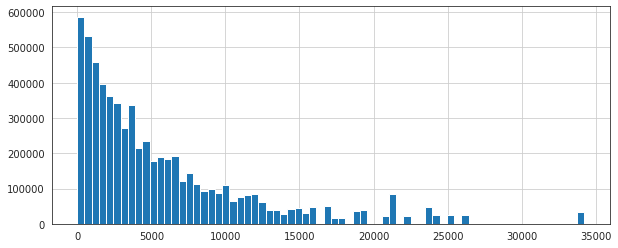

In [26]:
#x-axis is number of votes, y-axis is frquency
plt.figure(figsize=(10,4))
df_merged['count of votes'].hist(bins=70)

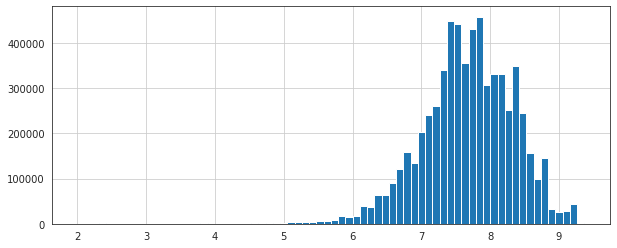

In [27]:
#x-axis is average rating and y-axis is frequenct of the rating
plt.figure(figsize=(10,4))
df_merged['average_rating'].hist(bins=70)

In [28]:
df_merged.shape

(6337239, 10)

Note that the new length of the dataframe is now 9,906

Using the Weighted Average Formula AND the members column based on popularity
WR = (vR + mC/v+m) where:
- v is the number of votes
- m is minimum votes required to be listed
- R is rating average of the anime
- C is mean vote across whole report

In [29]:
#looking at the members column before normalizing (we have a range of 0-1,000,000)
df_merged.head(3)

,name,count of votes,user_id,anime_id,rating,genre,type,episodes,average_rating,members
0,,6,53492,31687,2,"Dementia, Music",ONA,1,4.22,448
1,,6,47487,31687,1,"Dementia, Music",ONA,1,4.22,448
2,,6,3009,31687,4,"Dementia, Music",ONA,1,4.22,448


In [30]:
df_merged.members.max()

1013917

In [31]:
#normalizing the members column to a scale of 0-10
from sklearn import preprocessing

x = df_merged['members'].values #returns a numpy array
x = x.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,10))
x_scaled = min_max_scaler.fit_transform(x)
df_merged['members'] = pd.DataFrame(x_scaled)

In [32]:
#after normalizing, we have a scale of 0-10
df_merged.head(3)

,name,count of votes,user_id,anime_id,rating,genre,type,episodes,average_rating,members
0,,6,53492,31687,2,"Dementia, Music",ONA,1,4.22,0.004093
1,,6,47487,31687,1,"Dementia, Music",ONA,1,4.22,0.004093
2,,6,3009,31687,4,"Dementia, Music",ONA,1,4.22,0.004093


In [33]:
# Calculate the mean vote of average rating column
C = df_merged['average_rating'].mean()
C

7.674981203251645

Calculating the number of votes, m, received by a movie in the 90th percentile.

In [34]:
m = df_merged['count of votes'].quantile(0.90)
print(m)

13846.0


using m to filter out anime qualified for the model. ie anime with rating count >= m

In [35]:
q_anime = df_merged.copy().loc[df_merged['count of votes'] >= m]
q_anime.shape

(642142, 10)

In [36]:
df_merged.shape

(6337239, 10)

In [37]:
# Function that computes the weighted rating of each movie
def weighted_rating(x, m=m, C=C):
    v = x['count of votes']
    R = x['average_rating']
    P = x['members']
    # Calculation based on the IMDB formula
    return 0.5*(( (v*R+m*C)/(v+m) ) + P)

In [38]:
#Define a feature 'score' and calculate its value with `weighted_rating()`
q_anime['score'] = q_anime.apply(weighted_rating, axis=1) 

In [39]:
#Sort anime based on score calculated above

q_anime = q_anime.sort_values('score', ascending=False)
q_anime = q_anime.drop_duplicates(subset=['name'])

#Print the top 20 movies
q_anime[['name', 'count of votes', 'average_rating', 'score']].head(20)

,name,count of votes,average_rating,score
1320809,Death Note,34226,8.71,9.205944
5233402,Shingeki no Kyojin,25290,8.54,8.536600
5564126,Sword Art Online,26310,7.83,8.292462
1935174,Fullmetal Alchemist Brotherhood,21494,9.26,8.233320
1075905,Code Geass Hangyaku no Lelouch,24126,8.83,7.731045
233264,Angel Beats,23565,8.39,7.602354
5435036,Steins;Gate,17151,9.17,7.572674
4009194,Naruto,22071,7.81,7.248512
5891303,Toradora,20837,8.45,7.195825
3801955,Mirai Nikki TV,18649,8.07,7.191632
